# Examining the key factors influencing the number of houses sold in Ames.

## Introduction
The residential housing market is influenced by a lot of factors that determine the demand and sale of the properties.By analyzing some of these factors, this study aims to identify patterns and relationships that can guide homeowners , real estate agents and policy makers in making informed decisions.


## Objectives

1) To analyse the relationship between the sale prices of houses and the number of houses sold to determine suitable pricing strategies.
2) To evaluate how the total number of rooms above the ground influences buyer preferences and sales volume.
3) To assess the impact of a house's overall condition on it's marketability and it's sales rate.
4) To determine the factor that most determines the price of the house by comparing the correlation of various factors with Sales Price.
5) To study how the age of the affects its' attractiveness to buyers and how this affects it's Sale Price.

## Research Questions.
1) How does the Sale Price of a house influence the number of houses sold in the area?
2) How does the total number of rooms above the ground influence the number of houses sold?
3) How does the overall condition of houses impact their time on the market and their Sale Price?
4) What age bracket of houses is most attractive to buyers and how will this affect the Sale Price of the houses?
5) Which factor among the list of factors exhibits the strongest correlation with the Sale Price of houses in Ames?

### Note 
Please Copy this [link](https://docs.google.com/presentation/d/1FMQa3lXHdyBRI5xOelzac4KwngtmskTOPAehoG3tirs/edit?usp=sharing) for the non-technical presentation.

In [41]:
#loading the data_description.txt
with open('data/data_description.txt', 'r') as f:
    data = f.readlines()
df_1 = pd.DataFrame(data)
df_1

,0
0,MSSubClass: Identifies the type of dwelling in...
1,\n
2,20\t1-STORY 1946 & NEWER ALL STYLES\n
3,30\t1-STORY 1945 & OLDER\n
4,40\t1-STORY W/FINISHED ATTIC ALL AGES\n
...,...
518,"Abnorml\tAbnormal Sale - trade, forecl..."
519,AdjLand\tAdjoining Land Purchase\n
520,Alloca\tAllocation - two linked propert...
521,Family\tSale between family members\n


## Your Task: Explore the Ames Housing Dataset with Pandas

![aerial photo of a neighborhood](images/neighborhood_aerial.jpg)

Photo by <a href="https://unsplash.com/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Matt Donders</a> on <a href="/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>


### Requirements

In this lab you will use your data munging and visualization skills to conduct an exploratory analysis of the dataset.

#### 1. Load the Dataset with Pandas

Import pandas with the standard alias `pd` and load the data into a dataframe with the standard name `df`.

#### 2. Explore Data Distributions

Produce summary statistics, visualizations, and interpretive text describing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

#### 3. Explore Differences between Subsets

Separate the data into subsets based on `OverallCond`, then demonstrate how this split impacts the distribution of `SalePrice`.

#### 4. Explore Correlations

Find the features that have the strongest positive and negative correlations with `SalePrice`, and produce plots representing these relationships.

#### 5. Engineer and Explore a New Feature

Create a new feature `Age`, which represents the difference between the year sold and the year built, and plot the relationship between the age and sale price.

### Data Understanding

Each record (row) in this dataset represents a home that was sold in Ames, IA.

Each feature (column) in this dataset is some attribute of that home sale. You can view the file `data/data_description.txt` in this repository for a full explanation of all variables in this dataset — 80 columns in total.

We are going to focus on the following features:

**SalePrice**: `Sale price of the house in dollars`

**TotRmsAbvGrd**: `Total rooms above grade (does not include bathrooms)`

**OverallCond**: `Rates the overall condition of the house`
```
       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average	
       5	 Average
       4	 Below Average	
       3	 Fair
       2	 Poor
       1	 Very Poor
```

**YrSold**: `Year Sold (YYYY)`

**YearBuilt**: `Original construction date`

**LandSlope**: `Slope of property`
```
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
```

## 1. Load the Dataset with Pandas

In the cell below, import:
* `pandas` with the standard alias `pd`
* `matplotlib.pyplot` with the standard alias `plt`

And set `%matplotlib inline` so the graphs will display immediately below the cell that creates them.

In [3]:
# Your code here
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

Now, use pandas to open the file located at `data/ames.csv` ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)). Specify the argument `index_col=0` in order to avoid creating an extra `Id` column. Name the resulting dataframe `df`.

In [4]:
# Loading the Aimes Dataset
df = pd.read_csv('data/ames.csv' , index_col=0)

The following code checks that you loaded the data correctly:

In [4]:
# Run this cell without changes

# Check that df is a dataframe
assert type(df) == pd.DataFrame

# Check that there are the correct number of rows
assert df.shape[0] == 1460

# Check that there are the correct number of columns
# (if this crashes, make sure you specified `index_col=0`)
assert df.shape[1] == 80

In [5]:
# Run this cell without changes
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [59]:
df.describe() # To generate summary statistics of the column.

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [60]:
# Checking the no. of rows and columns in this dataset
df.shape[1] , df.shape[0]

(80, 1460)

Inspect the contents of the dataframe:

In [38]:
# Checkin the column information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

## 2. Explore Data Distributions

Write code to produce histograms showing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

Each histogram should have appropriate title and axes labels, as well as a black vertical line indicating the mean of the dataset. See the documentation for [plotting histograms](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html), [customizing axes](https://matplotlib.org/stable/api/axes_api.html#axis-labels-title-and-legend), and [plotting vertical lines](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axvline.html#matplotlib.axes.Axes.axvline) as needed.

### Sale Price

In the cell below, produce a histogram for `SalePrice`.

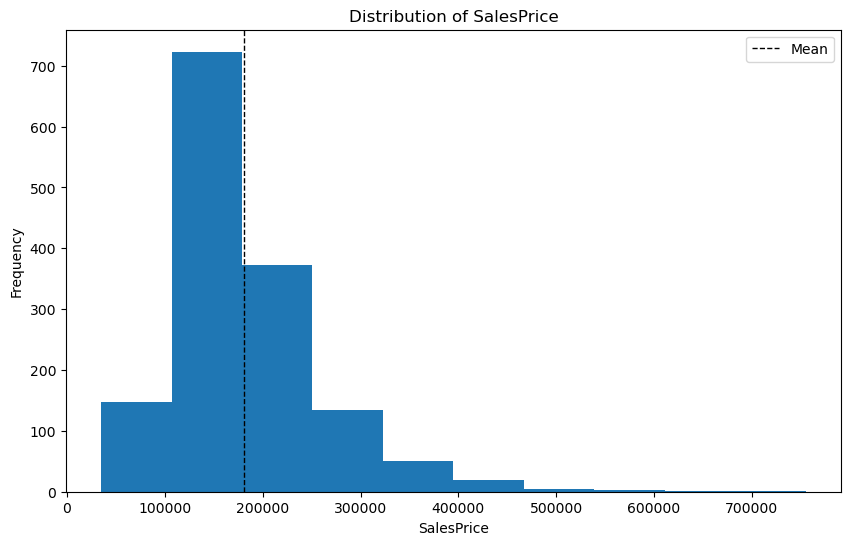

In [42]:
# Your code here
plt.figure(figsize = (10,6))

plt.hist(x = df['SalePrice'])


plt.title('Distribution of SalesPrice')
plt.xlabel('SalesPrice')
plt.ylabel('Frequency')

Mean = df['SalePrice'].mean()
plt.axvline(Mean , color = 'black' , linestyle = 'dashed' , linewidth = 1 , label = 'Mean')

plt.legend();

Now, print out the mean, median, and standard deviation:

In [43]:
# Your code here
Mean = df['SalePrice'].mean()
Median = df['SalePrice'].median()
Standard_deviation = df['SalePrice'].std()

print('Mean:' , Mean)
print('Median:' , Median)
print('Standard deviation:' , Standard_deviation)

Mean: 180921.19589041095
Median: 163000.0
Standard deviation: 79442.50288288663


In the cell below, interpret the above information.

In [14]:
# Replace None with appropriate text
"""
The majority of houses in this dataset are priced between $100000 and $250000, making this a typical range in the area.Also few high-priced homes skew the mean upward so the median of $ 163000 might be a typical representation of a "typical house price.The way the sale prices vary shows the diverse range of housing options in the market.
"""

'\nThe majority of houses in this dataset are priced between $100000 and $250000, making this a typical range in the area.Also few high-priced homes skew the mean upward so the median of $ 163000 might be a typical representation of a "typical house price.The way the sale prices vary shows the diverse range of housing options in the market.\n'

### Total Rooms Above Grade

In the cell below, produce a histogram for `TotRmsAbvGrd`.

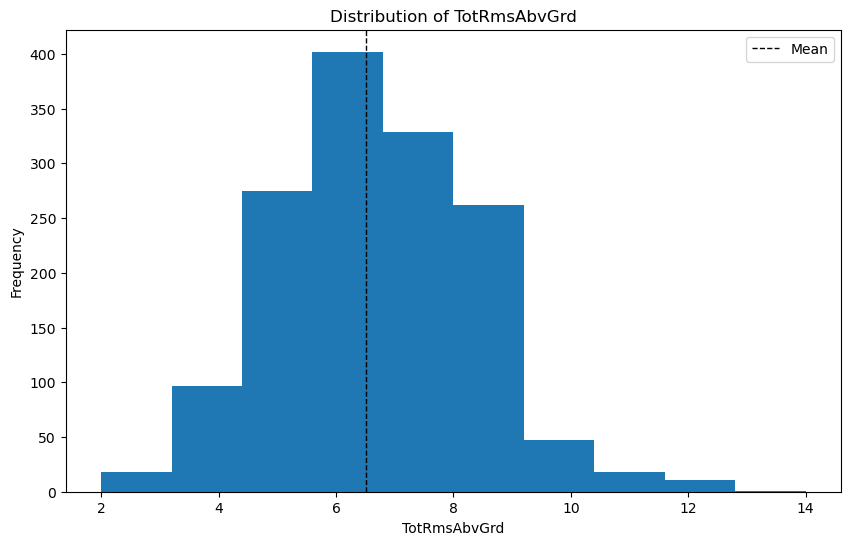

In [48]:
# Your code here
plt.figure(figsize = (10,6))

plt.hist(x = df['TotRmsAbvGrd'])
plt.title('Distribution of TotRmsAbvGrd')
plt.xlabel('TotRmsAbvGrd')
plt.ylabel('Frequency')

Mean = df['TotRmsAbvGrd'].mean()
plt.axvline(Mean , color = 'black' , linestyle = 'dashed' , linewidth = 1 , label = 'Mean')

plt.legend();

Now, print out the mean, median, and standard deviation:

In [10]:
# Your code here
Mean = df['TotRmsAbvGrd'].mean()
Median = df['TotRmsAbvGrd'].median()
Standard_deviation = df['TotRmsAbvGrd'].std()

print('Mean:' , Mean)
print('Median:' , Median)
print('Standard deviation:' , Standard_deviation)

Mean: 6.517808219178082
Median: 6.0
Standard deviation: 1.625393290584064


In the cell below, interpret the above information.

In [17]:
# Replace None with appropriate text
"""
The average house in this dataset has 6 rooms above ground, and this is representative of the majority of the houses in this area.The moderate spread indicates that houses with slightly fewer than 5 rooms or slightly higher than 7-8 rooms are also common.The presence of a few houses with very low or very high number of rooms above ground suggest some diversity in housing size though these are the expectations rather than the norm.
"""

'\nThe average house in this dataset has 6 rooms above ground, and this is representative of the majority of the houses in this area.The moderate spread indicates that houses with slightly fewer than 5 rooms or slightly higher than 7-8 rooms are also common.The presence of a few houses with very low or very high number of rooms above ground suggest some diversity in housing size though these are the expectations rather than the norm.\n'

### Overall Condition

In the cell below, produce a histogram for `OverallCond`.

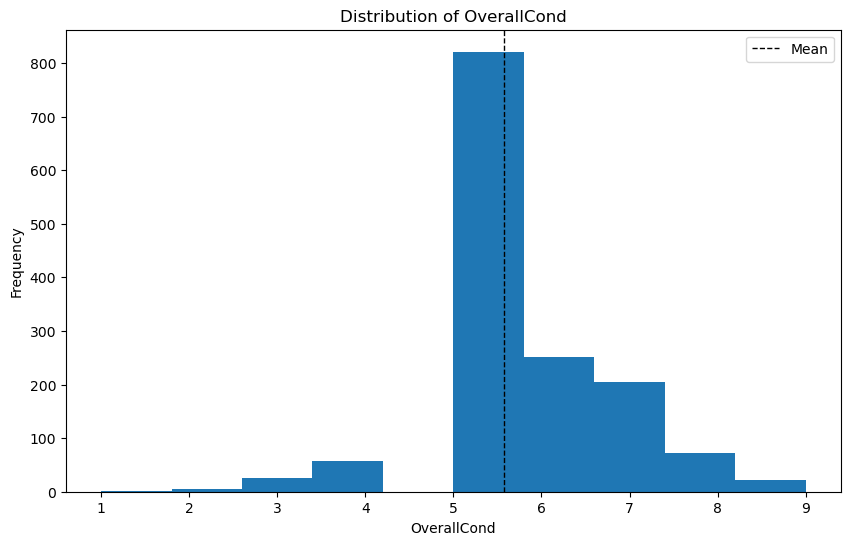

In [47]:
# Your code here
plt.figure(figsize = (10,6))

plt.hist(x = df['OverallCond'])

plt.title('Distribution of OverallCond')
plt.xlabel('OverallCond')
plt.ylabel('Frequency')

Mean = df['OverallCond'].mean()
plt.axvline(Mean , color = 'black' , linestyle = 'dashed' , linewidth = 1 , label = 'Mean')

plt.legend();

Now, print out the mean, median, and standard deviation:

In [12]:
# Your code here
Mean = df['OverallCond'].mean()
Median = df['OverallCond'].median()
Standard_deviation = df['OverallCond'].std()

print('Mean:' , Mean)
print('Median:' , Median)
print('Standard deviation:' , Standard_deviation)

Mean: 5.575342465753424
Median: 5.0
Standard deviation: 1.1127993367127367


In the cell below, interpret the above information.

In [49]:
# Replace None with appropriate text
"""
Most houses in the dataset have an overall condition rating of 5 or slightly above , indicating that the homes are in generally average condition.The consistency in ratings suggests limited variability in overall condition, which could be a result of maintenance practices or similar construction quality across properties.Homes with below-average conditions (ratings os 1-3) or excellent conditions(8-9) are rare and could significantly impact buyer preferences or pricing if targeted specifically.
"""

'\nMost houses in the dataset have an overall condition rating of 5 or slightly above , indicating that the homes are in generally average condition.The consistency in ratings suggests limited variability in overall condition, which could be a result of maintenance practices or similar construction quality across properties.Homes with below-average conditions (ratings os 1-3) or excellent conditions(8-9) are rare and could significantly impact buyer preferences or pricing if targeted specifically.\n'

## 3. Explore Differences between Subsets

As you might have noted in the previous step, the overall condition of the house seems like we should treat it as more of a categorical variable, rather than a numeric variable.

One useful way to explore a categorical variable is to create subsets of the full dataset based on that categorical variable, then plot their distributions based on some other variable. Since this dataset is traditionally used for predicting the sale price of a house, let's use `SalePrice` as that other variable.

In the cell below, create three variables, each of which represents a record-wise subset of `df` (meaning, it has the same columns as `df`, but only some of the rows).

* `below_average_condition`: home sales where the overall condition was less than 5
* `average_condition`: home sales where the overall condition was exactly 5
* `above_average_condition`: home sales where the overall condition was greater than 5

In [14]:
# Replace None with appropriate code - 
below_average_condition = df[df['OverallCond']<5]
average_condition =  df[df['OverallCond']==5]
above_average_condition = df[df['OverallCond']>5]

The following code checks that you created the subsets correctly:

In [15]:
# Run this cell without changes

# Check that all of them still have 80 columns
assert below_average_condition.shape[1] == 80
assert average_condition.shape[1] == 80
assert above_average_condition.shape[1] == 80

# Check the numbers of rows of each subset
assert below_average_condition.shape[0] == 88
assert average_condition.shape[0] == 821
assert above_average_condition.shape[0] == 551

The following code will produce a plot of the distributions of sale price for each of these subsets:

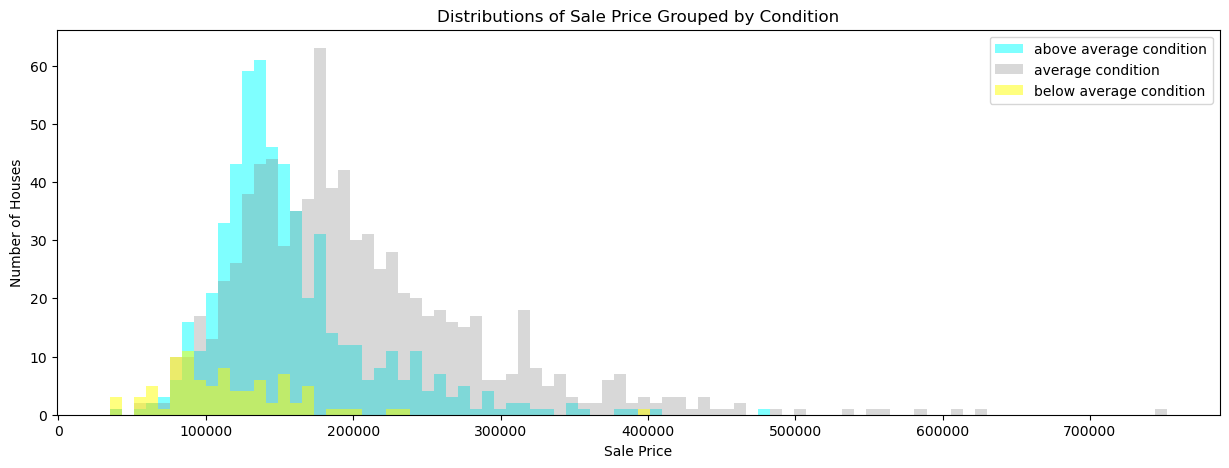

In [17]:
# Run this cell without changes

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Create custom bins so all are on the same scale
bins = range(df["SalePrice"].min(), df["SalePrice"].max(), int(df["SalePrice"].median()) // 20)

# Plot three histograms, with reduced opacity (alpha) so we
# can see them overlapping
ax.hist(
    x=above_average_condition["SalePrice"],
    label="above average condition",
    bins=bins,
    color="cyan",
    alpha=0.5
)
ax.hist(
    x=average_condition["SalePrice"],
    label="average condition",
    bins=bins,
    color="gray",
    alpha=0.3
)
ax.hist(
    x=below_average_condition["SalePrice"],
    label="below average condition",
    bins=bins,
    color="yellow",
    alpha=0.5
)

# Customize labels
ax.set_title("Distributions of Sale Price Grouped by Condition")
ax.set_xlabel("Sale Price")
ax.set_ylabel("Number of Houses")
ax.legend();

Interpret the plot above. What does it tell us about these overall condition categories, and the relationship between overall condition and sale price? Is there anything surprising?

In [19]:
# Replace None with appropriate text
"""
This plot shows that the number of houses sold in the below average condition are the lowest and also the Sale Price of these houses in this category was mostly below average except fo a few outliers.The surprising thing is that the Saleprice of the houses in the average condition have a higher SalePrice compared to the houses in the above average condition.This may imply that buyers considered other features other than the overall condition when buying the average condition homes.Also another surprising thing is that there is an area in this plot where the SalePrice of the houses in the below average condition, average condition and above average condition overlap; this could suggest that some other factors other than the overall condition are compensating for the poor condition. The plot also shows that above average condition homes do not show consistently higher SalePrices, it may imply diminishing returns for condition improvement , or that buyers prioritize other features 
"""

'\nThis plot shows that the number of houses sold in the below average condition are the lowest and also the Sale Price of these houses in this category was mostly below average except fo a few outliers.The surprising thing is that the Saleprice of the houses in the average condition have a higher SalePrice compared to the houses in the above average condition.This may imply that buyers considered other features other than the overall condition when buying the average condition homes.Also another surprising thing is that there is an area in this plot where the SalePrice of the houses in the below average condition, average condition and above average condition overlap; this could suggest that some other factors other than the overall condition are compensating for the poor condition. The plot also shows that above average condition homes do not show consistently higher SalePrices, it may imply diminishing returns for condition improvement , or that buyers prioritize other features \n'

## 4. Explore Correlations

To understand more about what features of these homes lead to higher sale prices, let's look at some correlations. We'll return to using the full `df`, rather than the subsets.

In the cell below, print out both the name of the column and the Pearson correlation for the column that is ***most positively correlated*** with `SalePrice` (other than `SalePrice`, which is perfectly correlated with itself).

We'll only check the correlations with some kind of numeric data type.

You can import additional libraries, although it is possible to do this just using pandas.

In [24]:
# Your code here
numeric_columns = df.select_dtypes(include=['number'])
correlation_values = numeric_columns.corr()

most_positively_correlated_column = correlation_values['SalePrice'].sort_values(ascending = False).index[1]
pearson_correlation_value = correlation_values['SalePrice'].sort_values(ascending = False).iloc[1]

print('Column Name:', most_positively_correlated_column)
print('Pearson Correlation_Value:', pearson_correlation_value)

Column Name: OverallQual
Pearson Correlation_Value: 0.7909816005838053


Now, find the ***most negatively correlated*** column:

In [25]:
# Your code here
most_negatively_correlated_column = correlation_values['SalePrice'].sort_values(ascending = True).index[1]
pearson_correlation_value = correlation_values['SalePrice'].sort_values(ascending = True).iloc[1]

print('Column Name:', most_negatively_correlated_column)
print('Pearson Correlation Value:', pearson_correlation_value)

Column Name: EnclosedPorch
Pearson Correlation Value: -0.1285779579259566


Once you have your answer, edit the code below so that it produces a box plot of the relevant columns.

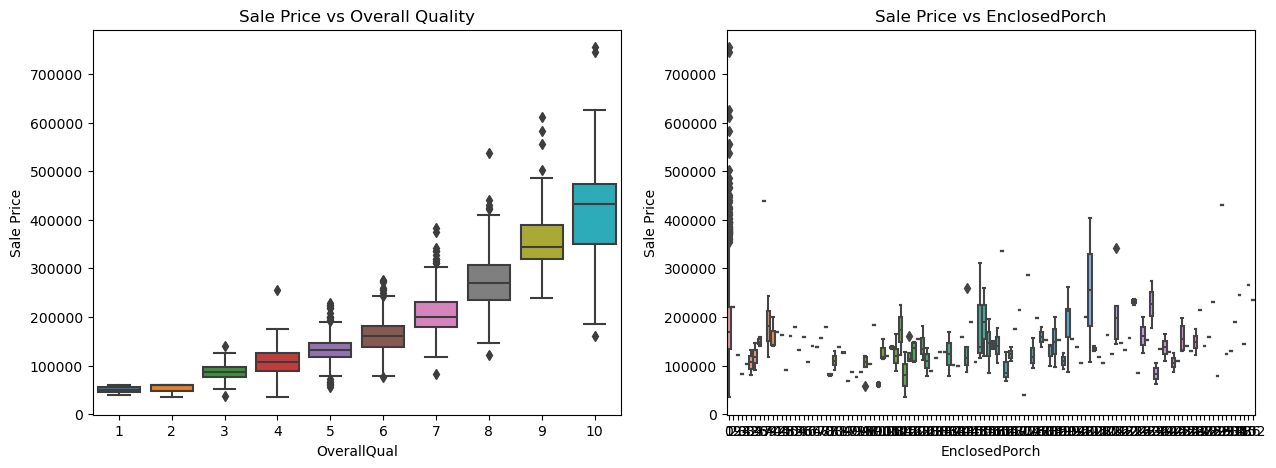

In [10]:
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))

# Plot distribution of column with highest correlation
sns.boxplot(
    x=df['OverallQual'],
    y=df["SalePrice"],
    ax=ax1
)
# Plot distribution of column with most negative correlation
sns.boxplot(
    x=df['EnclosedPorch'],
    y=df["SalePrice"],
    ax=ax2
)

# Customize labels
ax1.set_title("Sale Price vs Overall Quality")
ax1.set_xlabel('OverallQual')
ax1.set_ylabel("Sale Price")
ax2.set_title("Sale Price vs EnclosedPorch")
ax2.set_xlabel('EnclosedPorch')
ax2.set_ylabel("Sale Price")
plt.show()

Interpret the results below. Consult `data/data_description.txt` as needed.

In [20]:
# Replace None with appropriate text
"""
As for the right plot; Overall Quality increases, the median Sale Price also increases.This indicates a strong positive relationship between the quality of the house and its Sale Price.The spread of Sale Price also increases for higher quality houses(e.g categories 8 - 10 show wider interquartile ranges and more outliers).Outliers represent houses whose Sale Prices are significantly higher or lower than typical prices for a given quality level.Overall Quality is a significant predictor of Sale Price.This clear trend suggests houses with better overall quality consistently sell for higher prices.

As for the left plot, there does not appear to be a strong , clear trend or relationship between the size of an enclosed porch and the Sale Price.The relationship between Enclosed Porch and Sale Price is less apparent, suggesting that other factors may play a larger role determining Sale Price.
"""

'\nAs for the right plot; Overall Quality increases, the median Sale Price also increases.This indicates a strong positive relationship between the quality of the house and its Sale Price.The spread of Sale Price also increases for higher quality houses(e.g categories 8 - 10 show wider interquartile ranges and more outliers).Outliers represent houses whose Sale Prices are significantly higher or lower than typical prices for a given quality level.Overall Quality is a significant predictor of Sale Price.This clear trend suggests houses with better overall quality consistently sell for higher prices.\n\nAs for the left plot, there does not appear to be a strong , clear trend or relationship between the size of an enclosed porch and the Sale Price.The relationship between Enclosed Porch and Sale Price is less apparent, suggesting that other factors may play a larger role determining Sale Price.\n'

## 5. Engineer and Explore a New Feature

Here the code is written for you, all you need to do is interpret it.

We note that the data spans across several years of sales:

In [21]:
# Run this cell without changes
df["YrSold"].value_counts().sort_index()

YrSold
2006    314
2007    329
2008    304
2009    338
2010    175
Name: count, dtype: int64

Maybe we can learn something interesting from the age of the home when it was sold. This uses information from the `YrBuilt` and `YrSold` columns, but represents a truly distinct feature.

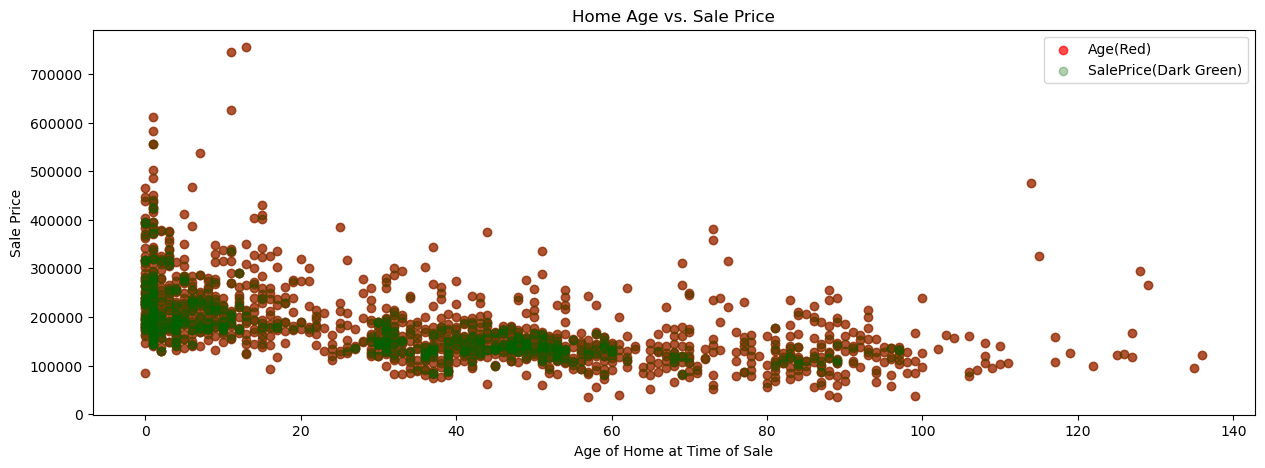

In [40]:
#Run this cell.

#Make a new column, Age
df["Age"] = df["YrSold"] - df["YearBuilt"]

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Plot Age vs. SalePrice - I have changed the color to different colors to represent the two datasets
ax.scatter(df["Age"], df["SalePrice"], alpha=0.7, color="red" , label = "Age(Red)")
ax.scatter(df["Age"], df["SalePrice"], alpha=0.3, color="darkgreen" , label = "SalePrice(Dark Green)")

ax.set_title("Home Age vs. Sale Price")
ax.set_xlabel("Age of Home at Time of Sale")
ax.set_ylabel("Sale Price")

ax.legend();

Interpret this plot below:

In [35]:
# Replace None with appropriate text
"""
Homes with less age generally have higher sale prices, likely due to modern features, less wear and tear and greater appeal.Homes that are older tend to have lower sale prices, possibly due to outdated designs, higher maintenance costs or other factors.
"""

'\nHomes with less age generally have higher sale prices, likely due to modern features, less wear and tear and greater appeal.Homes that are older tend to have lower sale prices, possibly due to outdated designs, higher maintenance costs or other factors.\n'

## Recommendation
1) For homebuyers; Look out for homes with higher quality ratings(prioritize these houses).
2) For sellers; Focus mostly on improving quality rather than porch expansions.
3) For realtors; Consider quality and age as crucial and key pricing factors.

## Summary
This study provides a foundational understanding of housing price dynamics and can guide future analysis or decision-making in the real estate market.